# Analysis of Job Postings (Data Analytics)

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. 


---


### QUESTION 1: Factors that impact salary

To predict salary you can frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).


### QUESTION 2: Factors that distinguish job category

There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry ?

###  Overview:

Part 1. Scrape and prepare your own data.

Part 2. Data Cleaning and Exploratory data analysis (EDA)

Part 3. Modelling and evaluation

Part 4. Executive summary

# Part 2 - Data Cleaning and Exploratory data analysis (EDA)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load csv file
csv = './job_info.csv'
df = pd.read_csv(csv)

In [3]:
# show column headers
print(df.columns)

#check dimensions / the number of (rows,columns) in a pandas dataframe table (array)
print(df.shape)

#check df non-null values
print(df.info())
# there are null values

# get a sense of the data
print(df.head(2))



Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Links', 'company',
       'job_title', 'location', 'employment_type', 'seniority',
       'job_categories', 'salary', 'payment_period', 'job_description',
       'requirements'],
      dtype='object')
(3920, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 14 columns):
Unnamed: 0         3920 non-null int64
Unnamed: 0.1       3920 non-null int64
Unnamed: 0.1.1     3920 non-null int64
Links              3920 non-null object
company            3910 non-null object
job_title          3910 non-null object
location           3021 non-null object
employment_type    3911 non-null object
seniority          3866 non-null object
job_categories     3911 non-null object
salary             3484 non-null object
payment_period     3484 non-null object
job_description    3911 non-null object
requirements       3801 non-null object
dtypes: int64(3), object(11)
memory usage: 428.8+ KB
None
   Unnamed

In [4]:
# remove first 4 columns. Since we already have the info, links is not required.
df = df.iloc[:, 4:] 
# To better comparison, drop the rows with null values
print(df.shape)
df.dropna(inplace=True)
print(df.shape)
print(df.columns)

(3920, 10)
(2699, 10)
Index(['company', 'job_title', 'location', 'employment_type', 'seniority',
       'job_categories', 'salary', 'payment_period', 'job_description',
       'requirements'],
      dtype='object')


In [5]:
# number of unique values in each column
for item in df:
    print(item, df[item].nunique())

company 1064
job_title 2021
location 632
employment_type 27
seniority 54
job_categories 264
salary 686
payment_period 2
job_description 2347
requirements 2376


In [6]:
# use lower case for the whole dataframe
df=df.apply(lambda x: x.astype(str).str.lower())

In [7]:
# check duplicate rows
df["is_duplicate"]= df.duplicated()
df[df["is_duplicate"]==True]

,company,job_title,location,employment_type,seniority,job_categories,salary,payment_period,job_description,requirements,is_duplicate
163,redmart limited,product manager,"singapore wine vault building, 6 fishery port ...",full time,professional,information technology,"$8,000to$11,000",monthly,roles & responsibilities\r\r\nas one of the fa...,requirements\r\r\nqualifications / relevant wo...,True
164,redmart limited,product manager,"singapore wine vault building, 6 fishery port ...",full time,professional,information technology,"$8,000to$11,000",monthly,roles & responsibilities\r\r\nas one of the fa...,requirements\r\r\nqualifications / relevant wo...,True
165,redmart limited,product manager,"singapore wine vault building, 6 fishery port ...",full time,professional,information technology,"$8,000to$11,000",monthly,roles & responsibilities\r\r\nas one of the fa...,requirements\r\r\nqualifications / relevant wo...,True
166,redmart limited,product manager,"singapore wine vault building, 6 fishery port ...",full time,professional,information technology,"$8,000to$11,000",monthly,roles & responsibilities\r\r\nas one of the fa...,requirements\r\r\nqualifications / relevant wo...,True
167,redmart limited,product manager,"singapore wine vault building, 6 fishery port ...",full time,professional,information technology,"$8,000to$11,000",monthly,roles & responsibilities\r\r\nas one of the fa...,requirements\r\r\nqualifications / relevant wo...,True
168,redmart limited,product manager,"singapore wine vault building, 6 fishery port ...",full time,professional,information technology,"$8,000to$11,000",monthly,roles & responsibilities\r\r\nas one of the fa...,requirements\r\r\nqualifications / relevant wo...,True
292,oro consultants pte. ltd.,director of finance,"northstar @ amk, 7030 ang mo kio avenue 5 569880",full time,senior management,accounting / auditing / taxation,"$12,000to$15,000",monthly,roles & responsibilities\r\r\nour client is a ...,requirements\r\r\nrequirements\r\r\nbachelor d...,True
429,machspeed human resources pte. ltd.,"production planner (5 days, clementi, $1800-2...","golden wall centre, 89 short street 188216",permanent,junior executive,"admin / secretarial, manufacturing","$1,800to$2,000",monthly,roles & responsibilities\r\r\nproduction plann...,requirements\r\r\njob requirements:-\r\r\nmini...,True
430,machspeed human resources pte. ltd.,"accounts officer (3-6 months contract, scienc...","golden wall centre, 89 short street 188216",permanent,executive,accounting / auditing / taxation,"$2,500to$2,800",monthly,roles & responsibilities\r\r\naccounts office...,requirements\r\r\njob requirements:-\r\r\nposs...,True
431,machspeed human resources pte. ltd.,"engineering assistant-qa (s$1800-2000+ot, day ...","golden wall centre, 89 short street 188216",permanent,junior executive,engineering,"$1,800to$2,000",monthly,roles & responsibilities\r\r\nengineering assi...,requirements\r\r\nrequirements\r\r\nminimum di...,True


In [8]:
# drop duplicate rows
df=df.drop_duplicates()
df["is_duplicate"]= df.duplicated()
print(df[df["is_duplicate"]==True])
df.drop(["is_duplicate"], axis=1, inplace=True)
print(df.columns)

Empty DataFrame
Columns: [company, job_title, location, employment_type, seniority, job_categories, salary, payment_period, job_description, requirements, is_duplicate]
Index: []
Index(['company', 'job_title', 'location', 'employment_type', 'seniority',
       'job_categories', 'salary', 'payment_period', 'job_description',
       'requirements'],
      dtype='object')


# Clean up salary

In [9]:
print(df.salary.head())

0     $7,000to$9,000
1    $3,500to$10,000
2     $4,500to$9,000
4     $4,000to$8,000
5     $6,500to$8,500
Name: salary, dtype: object


In [10]:
# remove $ and ,
df['salary'] = df['salary'].map(lambda x: x.replace('$',''))
df['salary'] = df['salary'].map(lambda x: x.replace(',',''))

In [11]:
# split salary into high and low range and drop the original column
split_salary= df['salary'].str.split("to", n = 1, expand = True) 
df['salary_low'] = split_salary[0]
df['salary_high'] = split_salary[1]
df.drop(['salary'], axis=1, inplace=True)

# change columns type to integer
for col in ['salary_low', 'salary_high']:
    df[col] = df[col].astype('int')

In [12]:
# check payment period 
df['payment_period'].value_counts()

monthly     2554
annually      92
Name: payment_period, dtype: int64

In [13]:
# convert annually salary_low to monthly
df['low_monthly']=df['salary_low']/12
df.loc[df['payment_period'] == 'annually', 'salary_low']=df.loc[df['payment_period']== 'annually', 'low_monthly']
df.drop(['low_monthly'], axis=1, inplace=True)

In [14]:
# convert annually salary_high to monthly
df['high_monthly']=df['salary_high']/12
df.loc[df['payment_period'] == 'annually', 'salary_high']=df.loc[df['payment_period']== 'annually', 'high_monthly']
df.drop(['high_monthly'], axis=1, inplace=True)

In [15]:
#check the Annually rows
df[df['payment_period'] == 'annually'].head(2)

,company,job_title,location,employment_type,seniority,job_categories,payment_period,job_description,requirements,salary_low,salary_high
102,ubs ag,data and documentation specialist,1 raffles quay 048583,full time,executive,banking and finance,annually,roles & responsibilities\r\r\nare you incredib...,requirements\r\r\nyou have:\r\r\n1. a universi...,3333.333333,5416.666667
110,micro focus software pte. ltd.,presales consultant - it operations,"harbourfront tower one, 1 harbourfront place 0...","permanent, full time",senior executive,"consulting , information technology, sales / r...",annually,"roles & responsibilities\r\r\nat micro focus, ...",requirements\r\r\nsummary\r\r\npresales role\r...,10833.333333,15000.000000


In [16]:
# drop this column since it is not needed
df.drop(['payment_period'], axis=1, inplace=True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# create average salary column
df['salary_avg'] = (df['salary_low']+df['salary_high'])/2

C:\Users\lj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


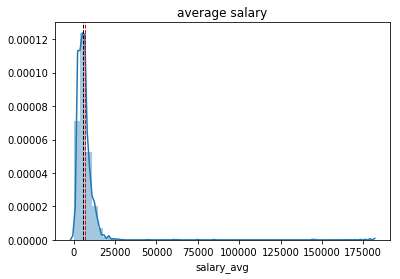

In [18]:
# Plot average salary
sns.distplot(df['salary_avg'])
plt.title("average salary")
plt.axvline(df['salary_avg'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df['salary_avg'].median(), color='black', linestyle='dashed', linewidth=1)
plt.show()

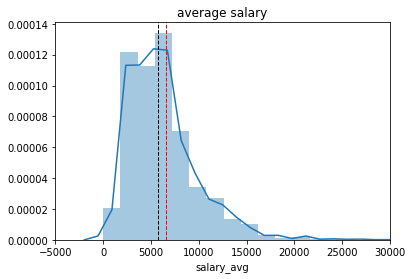

In [19]:
# Plot average salary (max 30000)
sns.distplot(df['salary_avg'],bins=100)
plt.title("average salary")
plt.axvline(df['salary_avg'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df['salary_avg'].median(), color='black', linestyle='dashed', linewidth=1)
plt.xlim(-5000, 30000)
plt.show()


In [20]:
df[df['salary_avg']>30000]
#  outliers

,company,job_title,location,employment_type,seniority,job_categories,job_description,requirements,salary_low,salary_high,salary_avg
577,inc research cro singapore pte. ltd.,sr clinical research associate,137 telok ayer street 068602,"permanent, full time","professional, executive, senior executive","environment / health , healthcare / pharmaceut...",roles & responsibilities\r\r\nthe senior clini...,requirements\r\r\nrequirements:\r\r\nba/bs deg...,80000.0,90000.0,85000.0
585,inc research cro singapore pte. ltd.,sr site start-up & regulatory specialist,137 telok ayer street 068602,"permanent, full time","professional, senior executive","environment / health , healthcare / pharmaceut...",roles & responsibilities\r\r\nperforms assigne...,requirements\r\r\nrequirements:\r\r\n ba/bs d...,70000.0,80000.0,75000.0
1314,ultra clean asia pacific pte. ltd.,chief operationg officer,"woodlands spectrum, 2 woodlands sector 1 738068","permanent, full time",senior management,manufacturing,roles & responsibilities\r\r\ndesigning and im...,requirements\r\r\npivotal experience & experti...,40000.0,80000.0,60000.0
1714,ncs pte. ltd.,lead / senior database administrator,"ncs hub, 5 ang mo kio street 62 569141",permanent,professional,information technology,roles & responsibilities\r\r\nposition summary...,requirements\r\r\nminimum 3 years of experienc...,5000.0,85000.0,45000.0
2045,six financial information singapore pte. ltd.,senior sales manager,"suntec tower two, 9 temasek boulevard 038989",full time,middle management,banking and finance,roles & responsibilities\r\r\nthe new position...,requirements\r\r\ncandidates should have a bac...,120000.0,170000.0,145000.0
2099,six financial information singapore pte. ltd.,head of sso (apac),"suntec tower two, 9 temasek boulevard 038989",full time,middle management,"banking and finance, others",roles & responsibilities\r\r\nthe sso group pr...,requirements\r\r\nmain duties\r\r\n1. a key po...,144000.0,216000.0,180000.0
3543,dtcc data repository (singapore) pte. ltd.,senior business systems analyst,"sgx centre i, 2 shenton way 068804",full time,senior executive,information technology,roles & responsibilities\r\r\nbusiness unit de...,requirements\r\r\nqualifications\r\r\nminimum ...,50000.0,75000.0,62500.0
3740,six financial information singapore pte. ltd.,senior sales manager,"suntec tower two, 9 temasek boulevard 038989",full time,middle management,"banking and finance, others",roles & responsibilities\r\r\nthe new position...,requirements\r\r\ncandidates should have a bac...,120000.0,170000.0,145000.0
3776,six financial information singapore pte. ltd.,head of sso (apac),"suntec tower two, 9 temasek boulevard 038989",full time,middle management,"banking and finance, others",roles & responsibilities\r\r\nthe sso group pr...,requirements\r\r\nmain duties\r\r\n1. a key po...,144000.0,216000.0,180000.0


In [21]:
print(df.shape)
df=df[df['salary_avg']<30000]
print(df.shape)
# drop 9 rows

(2646, 11)
(2637, 11)


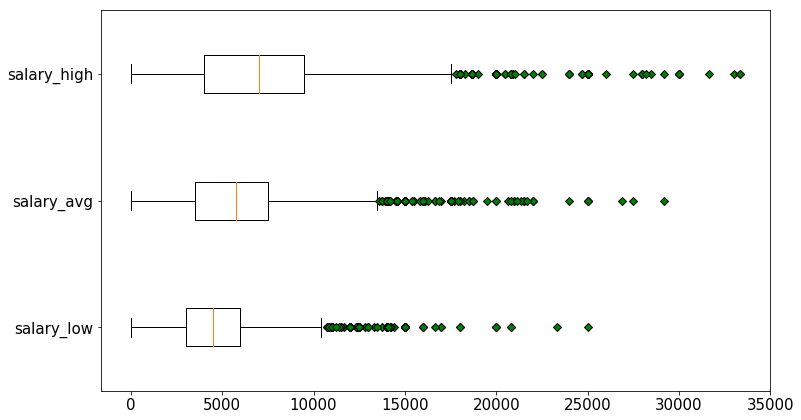

In [22]:
#plt.Figure(figsize=(120,100))
data=[df['salary_low'],df['salary_avg'], df['salary_high']]

fig1, ax1 = plt.subplots(figsize=(12,7))
#plt.set_title('Max Sal Plot')

ax1.boxplot(data,flierprops=dict(markerfacecolor='g', marker='D'),vert=False)
plt.xticks(fontsize=15)
ax1.set_yticklabels(['salary_low','salary_avg','salary_high'])
plt.yticks(fontsize=15)
plt.show()
# using the average salary as target

# clean up location

In [23]:
print(df['location'].nunique())
# lots of address

632


In [24]:
# remove building name
try:
    df['location'] = df['location'].str.rsplit(',').str[-1] 
except:
    pass
        
print(df['location'].head(2))

0    21 lower kent ridge road 119077
1          1 marina boulevard 018989
Name: location, dtype: object


In [25]:
# keep on road name
import string
df['location'] = df.location.map(lambda x: ''.join([y for y in list(x.lower()) if y in string.ascii_lowercase+" "]))
print(df.location.head)
print(df['location'].nunique())

<bound method NDFrame.head of 0                 lower kent ridge road 
1                      marina boulevard 
2                         raffles place 
4                     temasek boulevard 
5                          ubi crescent 
6                          ubi crescent 
7                   ayer rajah crescent 
8                        coleman street 
9                          cecil street 
10                     fusionopolis way 
15              north buona vista drive 
16                   pasir panjang road 
19                         collyer quay 
21                         biopolis way 
22                       henderson road 
23                       coleman street 
25                  ayer rajah crescent 
26                   science park drive 
27                     marina boulevard 
29                         orchard road 
30                lower kent ridge road 
33                        robinson road 
34                      finlayson green 
36                  ayer ra

# clean up job_description

In [26]:
print(df['job_description'][0])









provides direction and guidance to it teams in the management of the full data life-cycle.


In [27]:
# remove some common words
df['job_description'] = df['job_description'].map(lambda x: x.replace('roles & responsibilities',''))
df['job_description'] = df['job_description'].map(lambda x: x.replace('  description',''))

print(df['job_description'][0])









provides direction and guidance to it teams in the management of the full data life-cycle.


# clean up requirements

In [28]:
print(df['requirements'][0])










experience in higher education industry is a bonus.


In [29]:
# remove some common words
df['requirements'] = df['requirements'].map(lambda x: x.strip('requirements'))
print(df['requirements'][0])










experience in higher education industry is a bonus.


In [30]:
df.head(2)

,company,job_title,location,employment_type,seniority,job_categories,job_description,requirements,salary_low,salary_high,salary_avg
0,national university of singapore,"senior / associate director, data governance /...",lower kent ridge road,"permanent, full time",senior management,"education and training, information technology",\r\r\nthis leadership role will interact and e...,"\r\r\ndegree in information technology, comput...",7000.0,9000.0,8000.0
1,ntuc enterprise nexus co-operative limited,data scientist,marina boulevard,full time,executive,information technology,\r\r\nntuc enterprise is in the midst of its d...,"\r\r\n• masters in statistics, mathematics, co...",3500.0,10000.0,6750.0


In [31]:
df.to_csv('cleaned_df.csv')